In [2]:
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from utils import plot_grid_search

numpy.random.seed(1234)
data = pandas.read_csv("data/bialaczka.csv", header=0)

data.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1, inplace=True)

prediction_var = [str(i) for i in range(1, 21) if i not in [13]]

X = data[prediction_var]
y = data.Class
y = y.apply(lambda x: x - 1)

In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [6]:
max_features = ['auto', 'sqrt', 'log2']
max_depth = [i for i in range(6, 10)]

param_grid = {
    'max_features': max_features,
    'max_depth': max_depth
}

In [7]:
cv_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)
cv_rfc.fit(X, y)

display(cv_rfc.best_score_)
display(cv_rfc.best_params_)
pandas.DataFrame(cv_rfc.cv_results_)

0.2780487804878049

{'max_depth': 6, 'max_features': 'auto'}

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        0.003042         0.000715         0.278049          0.457984   
1        0.002260         0.000630         0.178049          0.462016   
2        0.002223         0.000609         0.239024          0.470012   
3        0.002451         0.000680         0.234146          0.564201   
4        0.002536         0.000701         0.202439          0.569867   
5        0.002513         0.000681         0.224390          0.563014   
6        0.002561         0.000639         0.234146          0.691086   
7        0.002486         0.000641         0.253659          0.686832   
8        0.002938         0.000703         0.243902          0.687287   
9        0.002744         0.000670         0.234146          0.788843   
10       0.002530         0.000585         0.209756          0.795720   
11       0.001679         0.000392         0.246341          0.794044   

   param_max_depth param_max_features  \
0                6               auto   
1                6               sqrt   
2                6               log2   
3                7               auto   
4                7               sqrt   
5                7               log2   
6                8               auto   
7                8               sqrt   
8                8               log2   
9                9               auto   
10               9               sqrt   
11               9               log2   

                                      params  rank_test_score  \
0   {'max_depth': 6, 'max_features': 'auto'}                1   
1   {'max_depth': 6, 'max_features': 'sqrt'}               12   
2   {'max_depth': 6, 'max_features': 'log2'}                5   
3   {'max_depth': 7, 'max_features': 'auto'}                6   
4   {'max_depth': 7, 'max_features': 'sqrt'}               11   
5   {'max_depth': 7, 'max_features': 'log2'}                9   
6   {'max_depth': 8, 'max_features': 'auto'}                6   
7   {'max_depth': 8, 'max_features': 'sqrt'}                2   
8   {'max_depth': 8, 'max_features': 'log2'}                4   
9   {'max_depth': 9, 'max_features': 'auto'}                6   
10  {'max_depth': 9, 'max_features': 'sqrt'}               10   
11  {'max_depth': 9, 'max_features': 'log2'}                3   

    split0_test_score  split0_train_score       ...         split7_test_score  \
0                0.30            0.488889       ...                  0.382353   
1                0.20            0.466667       ...                  0.117647   
2                0.32            0.475000       ...                  0.352941   
3                0.34            0.586111       ...                  0.205882   
4                0.22            0.547222       ...                  0.235294   
5                0.26            0.588889       ...                  0.264706   
6                0.30            0.722222       ...                  0.352941   
7                0.26            0.697222       ...                  0.235294   
8                0.30            0.688889       ...                  0.205882   
9                0.16            0.786111       ...                  0.411765   
10               0.28            0.786111       ...                  0.264706   
11               0.24            0.802778       ...                  0.352941   

    split7_train_score  split8_test_score  split8_train_score  \
0             0.433511            0.18750            0.473545   
1             0.468085            0.12500            0.447090   
2             0.462766            0.15625            0.481481   
3             0.563830            0.25000            0.563492   
4             0.566489            0.21875            0.582011   
5             0.579787            0.31250            0.582011   
6             0.707447            0.31250            0.714286   
7             0.680851            0.09375            0.669312   
8             0.680851            0

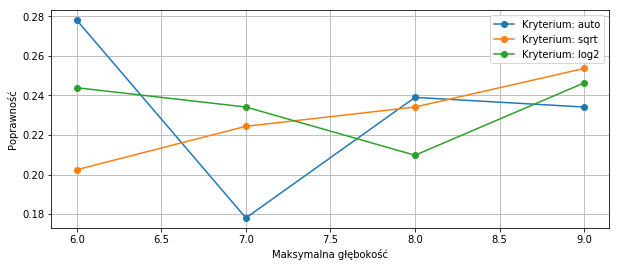

In [15]:
plt.rcParams["figure.figsize"] = [10,4]

plot_grid_search(cv_rfc.cv_results_, max_depth, max_features, 'Maksymalna głębokość', 'Kryterium')
plt.show()